In [11]:
import pandas as pd #Pandas
import itertools #itertools
import cobra as c #Cobrapy 
import pandas as pd
import cometspy as cm
from CAFBAFY import * 
import time
import itertools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Competition example
Simulation of a competition experiment between *E. coli* WT and a non-lethal mutant involving a deletion of the triose phosphate isomerase reaction from glycolysis. 

### Create layout

In [12]:
world=cm.layout()

# Add glucose 
world.set_specific_metabolite('glc__D_e', 0.01)
world.add_typical_trace_metabolites()

building empty layout model
models will need to be added with layout.add_model()


### Add model and create KO
To create KOs we can just the reaction bounds to 0. 

In [14]:
# load the wild-type model
E = cobra.io.read_sbml_model('Escherichia_coli_str_K_12_substr_MG1655.xml.gz')
wt=cm.model(E)
wt.change_bounds('EX_glc__D_e',-1000,1000)

#Construct the mutant
mut = cm.model(E)
mut.change_bounds('EX_glc__D_e',-1000,1000)
mut.change_bounds('TPI', 0,0)
mut.id = 'TPI_e_coli_core'

# set the initial biomasses for both models
wt.initial_pop = [0, 0, 5e-8]
mut.initial_pop = [0, 0, 5e-8]

# add the models to the layout
world.add_model(wt)
world.add_model(mut)

### Modify parameters
In this case, only the maximum number of cycles. 

In [15]:
comp_params = cm.params()
comp_params.all_params['writeMediaLog']=True
comp_params.all_params['maxCycles'] = 240

### Run simulation
Before running make sure to change the `JAVA_CLASSPATH`

In [16]:
comp_assay = cm.comets(world, comp_params)
comp_assay.set_classpath('gurobi','/Library/gurobi952/macos_universal2/lib/gurobi.jar')
comp_assay.run()

These are the expected locations for dependencies:
Dependency 			 expected path
__________ 			 _____________
gurobi			./lib/gurobi.jar

  You have two options to fix this problem:
1.  set each class path correctly by doing:
    comets.set_classpath(libraryname, path)
    e.g.   comets.set_classpath('hamcrest', '/home/chaco001/comets/junit/hamcrest-core-1.3.jar')

    note that versions dont always have to exactly match, but you're on your own if they don't

2.  fully define the classpath yourself by overwriting comets.JAVA_CLASSPATH
       look at the current comets.JAVA_CLASSPATH to see how this should look.

Running COMETS simulation ...


/Users/mrebolleda/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/mrebolleda/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/mrebolleda/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/mrebolleda/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mrebolleda/Desktop/comets_workshop/Escherichia_coli_str_K_12_substr_MG1655_xml.cmd'

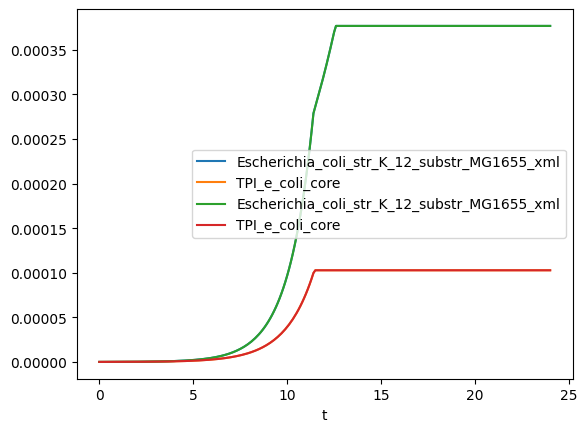

In [17]:
biomass = comp_assay.total_biomass
biomass['t'] = biomass['cycle'] * comp_assay.parameters.all_params['timeStep']

import matplotlib.pyplot as plt
myplot = biomass.drop(columns=['cycle']).plot(x = 't')

## Serial transfers
Using the same layout we can change the paratmeters to do 1% batch transfers every 24hrs. 

*For serial transfers biomass is discretized according to the* `cellSize` *parameter. This allows for stochastic sampling when the bottleneck is applied. The value of* `cellSize` *must be bigger than the minimal biomass allowed for a model in a cell (defined by* `minCellBiomass` *parameter).*

In [18]:
serial_params = cm.params()
serial_params.all_params['maxCycles'] = 240*25 # simulate 25 serial transfers of 24h each
serial_params.all_params['batchDilution'] = True
serial_params.all_params['dilFactor'] = 0.01
serial_params.all_params['dilTime'] = 24
serial_params.all_params['cellSize'] = 1e-9

### Run simulation

In [19]:
serial_expt = cm.comets(world, serial_params)
serial_expt.set_classpath('gurobi','/Library/gurobi952/macos_universal2/lib/gurobi.jar')
serial_expt.run()

These are the expected locations for dependencies:
Dependency 			 expected path
__________ 			 _____________
gurobi			./lib/gurobi.jar

  You have two options to fix this problem:
1.  set each class path correctly by doing:
    comets.set_classpath(libraryname, path)
    e.g.   comets.set_classpath('hamcrest', '/home/chaco001/comets/junit/hamcrest-core-1.3.jar')

    note that versions dont always have to exactly match, but you're on your own if they don't

2.  fully define the classpath yourself by overwriting comets.JAVA_CLASSPATH
       look at the current comets.JAVA_CLASSPATH to see how this should look.

Running COMETS simulation ...


/Users/mrebolleda/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/mrebolleda/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/mrebolleda/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/mrebolleda/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mrebolleda/Desktop/comets_workshop/Escherichia_coli_str_K_12_substr_MG1655_xml.cmd'

In [16]:
print(serial_expt.run_output)

-script
running script file: /home/mariargz/Dropbox/FBA_LEARNING/Scripts/.current_script
Loading layout file '/home/mariargz/Dropbox/FBA_LEARNING/Scripts/.current_layout'...
Found 2 model files!
Loading 'Escherichia_coli_str_K_12_substr_MG1655_xml.cmd' ...
Loading 'Escherichia_coli_str_K_12_substr_MG1655_xml.cmd' ...
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Done!
 Testing default parameters...
Done!
Optimizer status code = 5 (looks ok!)
objective solution = 84.77275723719083
Loading 'TPI_e_coli_core.cmd' ...
Loading 'TPI_e_coli_core.cmd' ...
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Done!
 Testing default parameters...
Done!
Optimizer status code = 5 (looks ok!)
objective solution = 84.77275723719083
Constructing world...
Done!
medialist	12ppd__R_e	12ppd__S_e	14glucan_e	15dap_e	23camp_e	23ccmp_e	23cgmp_e	23cump_e	23dappa_e	26dap__M_e	2ddglcn_e	2ohph_c	2pg_e	2pglyc_e	34dhpac_e	3amp_e

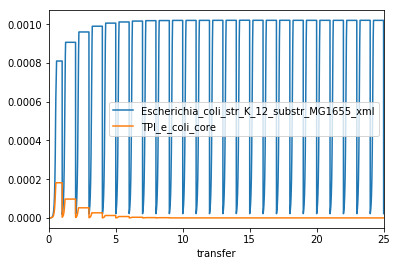

In [17]:
biomass = serial_expt.total_biomass
biomass['transfer'] = biomass['cycle'] * comp_assay.parameters.all_params['timeStep']/24

myplot = biomass.drop(columns=['cycle']).plot(x = 'transfer')

In [18]:
print(comp_assay.parameters.all_params['timeStep'])

0.1
